<a href="https://colab.research.google.com/github/MayureshOP-max/DataAnalytics/blob/main/day8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv("/content/Student_Performance.csv")

In [5]:
print(data.head())
print(data.info())
print(data.isnull().sum())
print(data.shape)
print(data.duplicated().sum())

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------              

In [7]:
data.drop_duplicates(inplace=True)
print(data.describe().T)

                                   count       mean        std   min   25%  \
Hours Studied                     9873.0   4.992100   2.589081   1.0   3.0   
Previous Scores                   9873.0  69.441102  17.325601  40.0  54.0   
Sleep Hours                       9873.0   6.531652   1.697683   4.0   5.0   
Sample Question Papers Practiced  9873.0   4.583004   2.867202   0.0   2.0   
Performance Index                 9873.0  55.216651  19.208570  10.0  40.0   

                                   50%   75%    max  
Hours Studied                      5.0   7.0    9.0  
Previous Scores                   69.0  85.0   99.0  
Sleep Hours                        7.0   8.0    9.0  
Sample Question Papers Practiced   5.0   7.0    9.0  
Performance Index                 55.0  70.0  100.0  


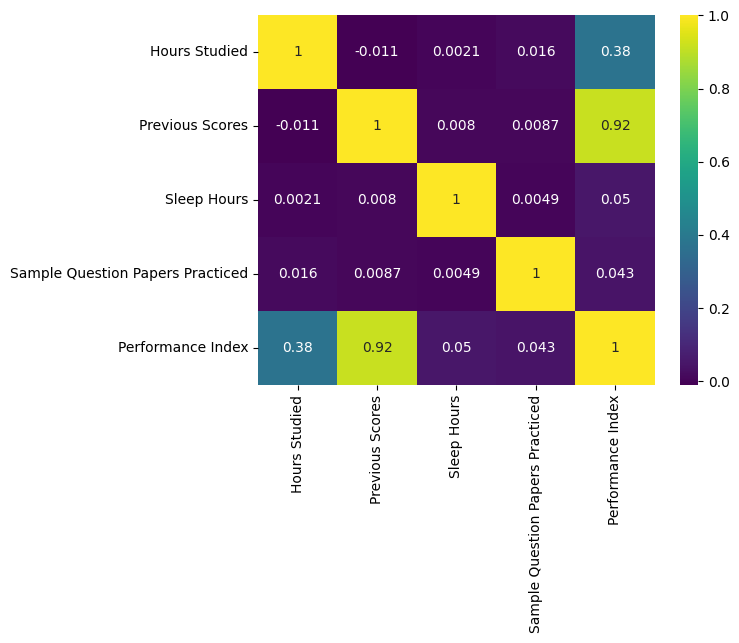

In [13]:
sns.heatmap(data = data.select_dtypes(exclude = "object").corr(), annot = True, cmap = "viridis")
plt.show()

In [11]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

print(x)
print(y)

[[7 99 'Yes' 9 1]
 [4 82 'No' 4 2]
 [8 51 'Yes' 7 2]
 ...
 [6 83 'Yes' 8 5]
 [9 97 'Yes' 7 0]
 [7 74 'No' 8 1]]
[91. 65. 45. ... 74. 95. 64.]


# ***Risk Analysis***

In [14]:
#Part 1
def roll_dice():
    return np.sum(np.random.randint(1,7,2))

In [15]:
print(roll_dice())
print(roll_dice())
print(roll_dice())

10
9
3


In [17]:
#part2
#someone approaches us saying I will give you 5 dollars if yuo get 7
#and take 1 dollar if you get any number other than 7
#How do we know what will happen?
#Our own monte carlo like function

def monte_carlo_simulation(runs = 1000):
  results = np.zeros(2)  #an array, results[1] initialized to twi zeroes

  for _ in range(runs):
    if roll_dice() == 7:
      results[0] += 5
    else:
      results[1] += 1
  return results

#test 2-3 time and claculate how much yuo will win
print(monte_carlo_simulation())
print(monte_carlo_simulation())
print(monte_carlo_simulation())

[770. 846.]
[825. 835.]
[850. 830.]


In [18]:
#Part 3: Now do it thousand times: Take some time
results = np.zeros((1000,2))

for i in range(1000):
  results[i] = monte_carlo_simulation()[0]

print(results)


[[755. 755.]
 [800. 800.]
 [740. 740.]
 ...
 [860. 860.]
 [755. 755.]
 [745. 745.]]


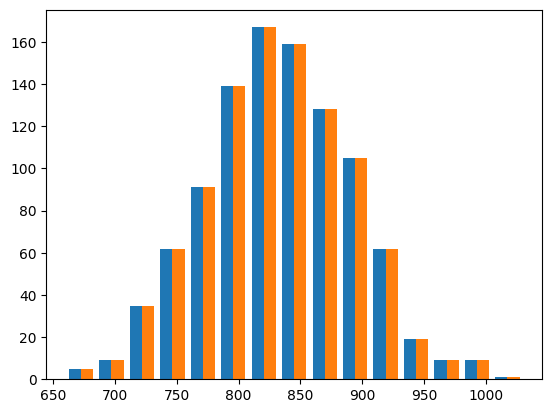

In [19]:
#Lets plot it

fig, ax = plt.subplots()
ax.hist(results, bins = 15)
plt.show()

In [20]:
#Our win/loss

print(results.mean())  #Genreal mean
print(results.mean()*5)  #What we will get as mean on average
print(results.mean()*4.75)   #Just a marginal change in win reward - see the impact
print(1000-results.mean())    #what we will pay on an average
print(results.mean() / 1000)    #Probability of the 'we will win' result


832.025
4160.125
3952.11875
167.97500000000002
0.832025


In [ ]:
# The last probability should be close to the theorotical probabilty of getting a 7
#   when we throe two dice(why? 1+6, 2+5,3+4, 4+3, 5+2, 6+1 - 6 put pf 36 states)

